In [435]:
#  An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their
#  website and browse for courses. 
# The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for
# the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also 
# gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads
# get converted while most do not. The typical lead conversion rate at X education is around 30%. 
# Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.
#  To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead
#  conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 
# X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build
# a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower
#  lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%



Goals of the Case Study

In [436]:
# There are quite a few goals for this case study:

# Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would
# mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
# There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle
# these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include 
# this in your final PPT where you'll make recommendations.


In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [438]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)

In [439]:
data = pd.read_csv(r'C:\Users\dhima\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [440]:
# target  column i.e dependent column  : "Converted"
data['Converted'].value_counts()


Converted
0    5679
1    3561
Name: count, dtype: int64

In [441]:
data.shape

(9240, 37)

In [442]:
#  and lead numberdropping prospect id
data.drop(columns=['Prospect ID', 'Lead Number'],inplace=True)

In [443]:
# splitting columns into cat and num type
Category_col=[i for i in data.columns if data[i].dtype=="O"]

In [444]:
numerical_col=[i for i in data.columns if data[i].dtype!="O"]

In [445]:
Category_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [446]:
# checking unique for category data

In [447]:
print(data.shape)
for i in data.columns:
    if i in Category_col:
        print(i,'have unique values', data[i].nunique())
#looking category of 

(9240, 35)
Lead Origin have unique values 5
Lead Source have unique values 21
Do Not Email have unique values 2
Do Not Call have unique values 2
Last Activity have unique values 17
Country have unique values 38
Specialization have unique values 19
How did you hear about X Education have unique values 10
What is your current occupation have unique values 6
What matters most to you in choosing a course have unique values 3
Search have unique values 2
Magazine have unique values 1
Newspaper Article have unique values 2
X Education Forums have unique values 2
Newspaper have unique values 2
Digital Advertisement have unique values 2
Through Recommendations have unique values 2
Receive More Updates About Our Courses have unique values 1
Tags have unique values 26
Lead Quality have unique values 5
Update me on Supply Chain Content have unique values 1
Get updates on DM Content have unique values 1
Lead Profile have unique values 6
City have unique values 7
Asymmetrique Activity Index have uni

In [448]:
# numerical data check

In [449]:
data[numerical_col].describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [450]:
# column TotalVisits,Total Time Spent on Website, might have some outliers

Cheking Nulls

In [451]:
[print(i,data[i].isna().sum())for i in data.columns if data[i].isna().sum()>0]

Lead Source 36
TotalVisits 137
Page Views Per Visit 137
Last Activity 103
Country 2461
Specialization 1438
How did you hear about X Education 2207
What is your current occupation 2690
What matters most to you in choosing a course 2709
Tags 3353
Lead Quality 4767
Lead Profile 2709
City 1420
Asymmetrique Activity Index 4218
Asymmetrique Profile Index 4218
Asymmetrique Activity Score 4218
Asymmetrique Profile Score 4218


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [452]:
# converting all category missing data into new data type missing i.e. new class missing for nulls

Filling 'Missing' in for all nan values in Category Varibale

In [453]:
for i in Category_col:
    if data[i].isnull().sum()>0:
        data[i].fillna('Missing',inplace=True)

In [454]:
data[Category_col].isna().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Tags                                             0
Lead Quality                   

In [455]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [456]:
data[numerical_col].isnull().sum()

Converted                         0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Asymmetrique Activity Score    4218
Asymmetrique Profile Score     4218
dtype: int64

In [457]:
data[numerical_col]

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0,0.0,0,0.00,15.0,15.0
1,0,5.0,674,2.50,15.0,15.0
2,1,2.0,1532,2.00,14.0,20.0
3,0,1.0,305,1.00,13.0,17.0
4,1,2.0,1428,1.00,15.0,18.0
...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,15.0,17.0
9236,0,2.0,238,2.00,14.0,19.0
9237,0,2.0,199,2.00,13.0,20.0
9238,1,3.0,499,3.00,15.0,16.0


In [458]:
data[numerical_col].describe(percentiles=[.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
95%,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [459]:
# missing values in Numerical columns 
'TotalVisits'
'Total Time Spent on Website'
'Page Views Per Visit'
'Asymmetrique Activity Score'
'Asymmetrique Profile Score'

'Asymmetrique Profile Score'

In [460]:
'Converting actegory into 1,0'
data.replace('Yes',1,inplace=True)

data.replace('No',0,inplace=True)

Ploting for Category Columns

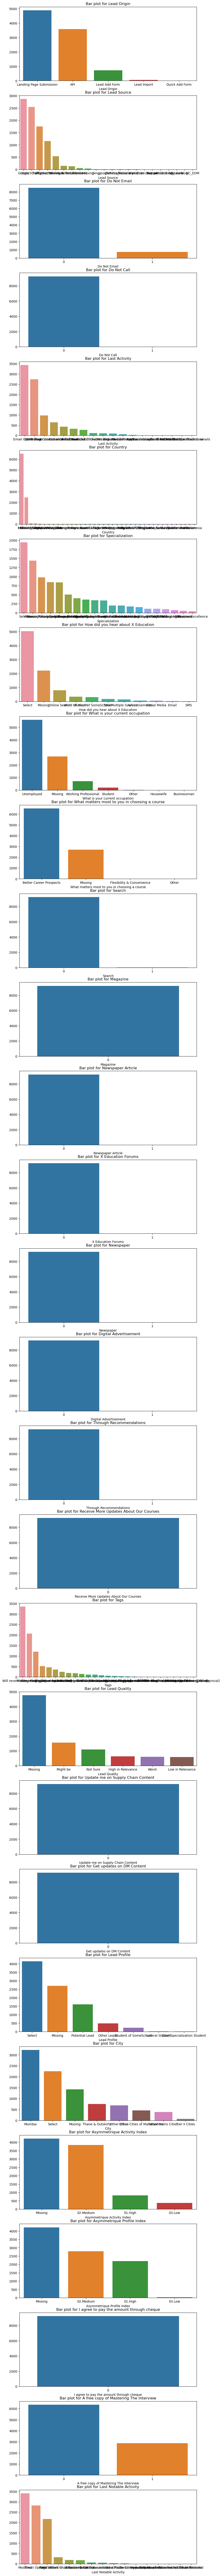

In [461]:
fig, axes = plt.subplots(nrows=len(Category_col), figsize=(10, 5*len(Category_col)))

for i, cat in enumerate(Category_col):
    sns.barplot(x=data[cat].value_counts().index, y=data[cat].value_counts().values, ax=axes[i])
    axes[i].set_title(f'Bar plot for {cat}')
    axes[i].set_xlabel(cat)
    
# plt.tight_layout()
plt.show()


In [462]:
pd.set_option('display.max_rows',200)

Categorical trestment

In [463]:
from numpy import percentile
under_inv=['Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums',
 'Newspaper','Digital Advertisement','Through Recommendations',
 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
 'Get updates on DM Content','I agree to pay the amount through cheque']
for i in under_inv:
    print(i, data[i].value_counts(normalize=True))

Do Not Call Do Not Call
0    0.999784
1    0.000216
Name: proportion, dtype: float64
Search Search
0    0.998485
1    0.001515
Name: proportion, dtype: float64
Magazine Magazine
0    1.0
Name: proportion, dtype: float64
Newspaper Article Newspaper Article
0    0.999784
1    0.000216
Name: proportion, dtype: float64
X Education Forums X Education Forums
0    0.999892
1    0.000108
Name: proportion, dtype: float64
Newspaper Newspaper
0    0.999892
1    0.000108
Name: proportion, dtype: float64
Digital Advertisement Digital Advertisement
0    0.999567
1    0.000433
Name: proportion, dtype: float64
Through Recommendations Through Recommendations
0    0.999242
1    0.000758
Name: proportion, dtype: float64
Receive More Updates About Our Courses Receive More Updates About Our Courses
0    1.0
Name: proportion, dtype: float64
Update me on Supply Chain Content Update me on Supply Chain Content
0    1.0
Name: proportion, dtype: float64
Get updates on DM Content Get updates on DM Content
0    1.

In [464]:
# Remove the columns in Category_col that are in under_inv
Category_col = [cat for cat in Category_col if cat not in under_inv]

# Drop the columns in under_inv from the data DataFrame
data.drop(columns=under_inv, inplace=True)


In [465]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [466]:
data['Lead Origin'].value_counts()


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [467]:
# as the Quick_add form is not very big.==> combining with Lead_Import
data['Lead Origin']=data['Lead Origin'].replace('Quick Add Form','Lead Import')
data['Lead Origin'].value_counts()



Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  56
Name: count, dtype: int64

In [468]:
data['Lead Source'].value_counts()


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Missing                36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [469]:
data['Lead Source'].value_counts().index

Index(['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference',
       'Welingak Website', 'Referral Sites', 'Facebook', 'Missing', 'bing',
       'google', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
       'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home',
       'WeLearn', 'blog', 'NC_EDM'],
      dtype='object', name='Lead Source')

In [470]:
# as all other class is very few converging all into one column name others
col=['bing','google', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
       'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home',
       'WeLearn', 'blog', 'NC_EDM']
for i in col:
    data['Lead Source']=data['Lead Source'].replace(i,'Other')

data['Lead Source'].value_counts()

Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Missing               36
Other                 28
Name: count, dtype: int64

In [471]:
# Corrected

In [472]:
Category_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [473]:
data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Missing                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [474]:
data['Last Activity'].value_counts().index


Index(['Email Opened', 'SMS Sent', 'Olark Chat Conversation',
       'Page Visited on Website', 'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Missing',
       'Unreachable', 'Unsubscribed', 'Had a Phone Conversation',
       'Approached upfront', 'View in browser link Clicked', 'Email Received',
       'Email Marked Spam', 'Visited Booth in Tradeshow',
       'Resubscribed to emails'],
      dtype='object', name='Last Activity')

In [475]:
# as last 4 activiites are very few then combining columns to one columns 'Other last activity'
# No impute as there is no absolute majory

least_activity=['Email Received',
       'Email Marked Spam', 'Visited Booth in Tradeshow',
       'Resubscribed to emails']
for i in least_activity:
    data['Last Activity']=data['Last Activity'].replace(i,'Other last activity')
data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Missing                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Other last activity                6
Name: count, dtype: int64

In [476]:
data['Country'].value_counts()

Country
India                   6492
Missing                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [477]:
data['City'].unique()

array(['Select', 'Mumbai', 'Missing', 'Thane & Outskirts',
       'Other Metro Cities', 'Other Cities',
       'Other Cities of Maharashtra', 'Tier II Cities'], dtype=object)

In [478]:
indian_city = ['Mumbai', 'Thane & Outskirts', 'Other Cities of Maharashtra']

for i in data.index:
    if data.loc[i, 'Country'] == 'Missing' and data.loc[i, 'City'] in indian_city:
        data.loc[i, 'Country'] = 'India'




In [479]:
data['Country'].value_counts()

Country
India                   6826
Missing                 2127
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [480]:
# mergging countries below 10 as "other country"
country_w_low=['Bahrain', 'Hong Kong', 'Oman', 'France', 'unknown', 'Kuwait',
       'South Africa', 'Canada', 'Nigeria', 'Germany', 'Sweden', 'Philippines',
       'Uganda', 'Italy', 'Bangladesh', 'Netherlands', 'Asia/Pacific Region',
       'China', 'Belgium', 'Ghana', 'Kenya', 'Sri Lanka', 'Tanzania',
       'Malaysia', 'Liberia', 'Switzerland', 'Denmark', 'Russia', 'Vietnam',
       'Indonesia']

for i in country_w_low:
    data['Country']=data['Country'].replace(i,'Other Country ')
data['Country'].value_counts()


Country
India                   6826
Missing                 2127
Other Country             82
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: count, dtype: int64

In [481]:
data['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Missing                        1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [482]:
city_col=data['City'].value_counts().index

In [483]:
for i in city_col:
    data['City']=data['City'].replace('Select','Missing')
data['City'].value_counts()

City
Missing                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [484]:
data['Specialization'].value_counts()

Specialization
Select                               1942
Missing                              1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [485]:
'merging the Selct and missing as selct is alsso missing'
data['Specialization']=data['Specialization'].replace('Select','Missing')
data['Specialization'].value_counts()

Specialization
Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [486]:
Category_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [487]:
data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Missing                  2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [488]:
data['How did you hear about X Education']=data['How did you hear about X Education'].replace('Select','Missing')

In [489]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [490]:
data['What matters most to you in choosing a course'].value_counts()
# no need for edit 

What matters most to you in choosing a course
Better Career Prospects      6528
Missing                      2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [491]:
data['Tags'].value_counts()

Tags
Missing                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [492]:
# lead quality is based on employee cant be used
data.drop(columns='Lead Quality', inplace=True)

In [493]:
data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [494]:
# Clubbing less than 10 into one Other
data['Last Notable Activity'].value_counts().index

Index(['Modified', 'Email Opened', 'SMS Sent', 'Page Visited on Website',
       'Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails',
       'View in browser link Clicked', 'Form Submitted on Website',
       'Email Received'],
      dtype='object', name='Last Notable Activity')

In [495]:
last_activity_col=['Email Marked Spam', 'Approached upfront', 'Resubscribed to emails',
       'View in browser link Clicked', 'Form Submitted on Website',
       'Email Received']
for i in last_activity_col:
    data['Last Notable Activity']=data['Last Notable Activity'].replace(i,'Other Notable actvity')

In [496]:
Category_col.remove('Lead Quality')

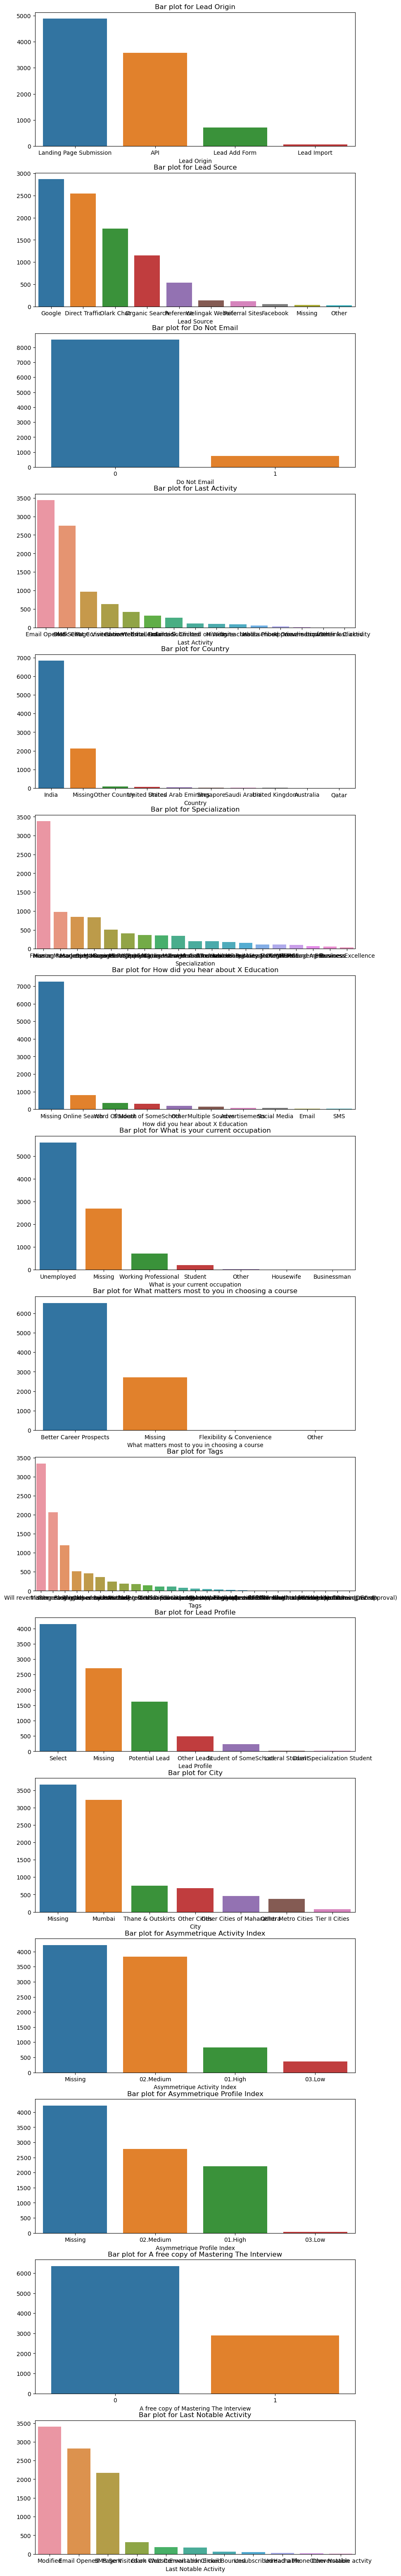

In [497]:
fig, axes = plt.subplots(nrows=len(Category_col), figsize=(10, 5*len(Category_col)))

for i, cat in enumerate(Category_col):
    sns.barplot(x=data[cat].value_counts().index, y=data[cat].value_counts().values, ax=axes[i])
    axes[i].set_title(f'Bar plot for {cat}')
    axes[i].set_xlabel(cat)
    
# plt.tight_layout()
plt.show()

<Axes: xlabel='Asymmetrique Activity Index', ylabel='Count'>

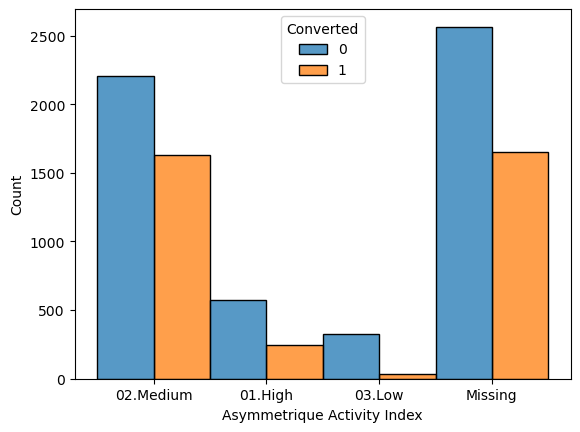

In [498]:
sns.histplot(data=data, x='Asymmetrique Activity Index', hue='Converted', multiple='dodge')

<Axes: xlabel='Asymmetrique Profile Index', ylabel='Count'>

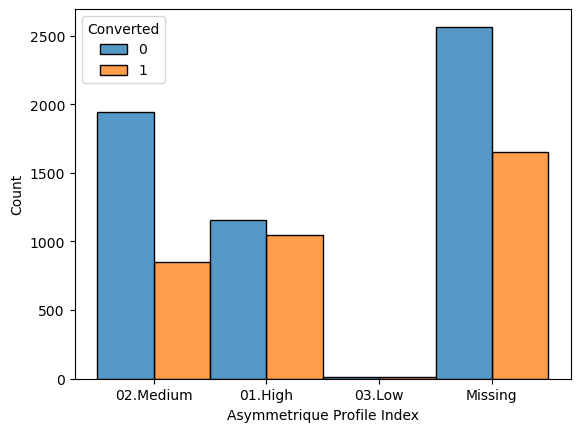

In [499]:
sns.histplot(data=data, x='Asymmetrique Profile Index', hue='Converted', multiple='dodge')

Visulaising Numerical col & outliers Treatment and missing value trestment and Normalising

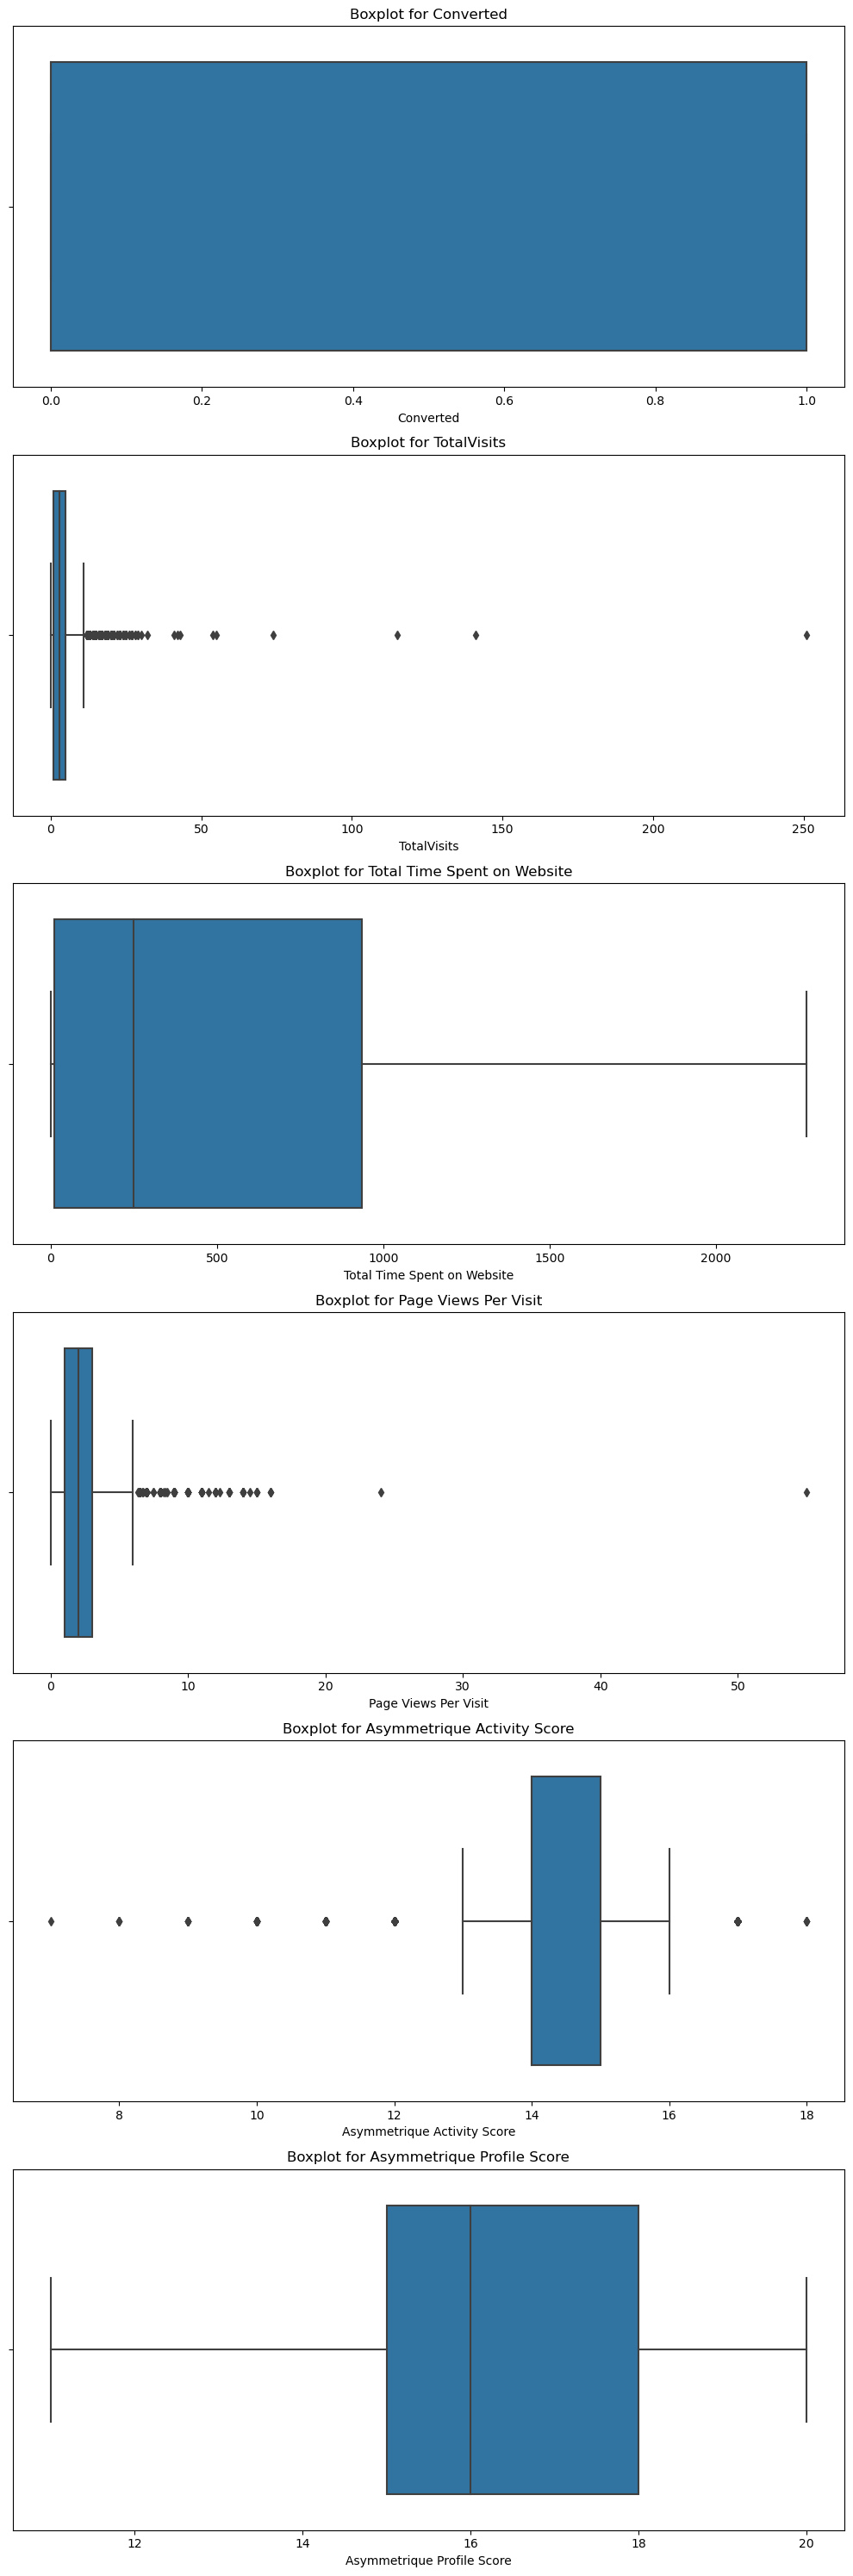

In [500]:


# Create subplots
fig, axes = plt.subplots(nrows=len(numerical_col), figsize=(10, 5 * len(numerical_col)))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_col):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Adjust layout
plt.tight_layout()
plt.show()


In [501]:
for i in numerical_col:
    print(i, 'null % =',data[i].isna().sum()*100/len(data))

Converted null % = 0.0
TotalVisits null % = 1.4826839826839826
Total Time Spent on Website null % = 0.0
Page Views Per Visit null % = 1.4826839826839826
Asymmetrique Activity Score null % = 45.64935064935065
Asymmetrique Profile Score null % = 45.64935064935065


In [502]:
data[numerical_col].describe(percentiles=[.80,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
80%,1.000000,5.000000,1087.200000,4.000000,15.000000,18.000000
90%,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


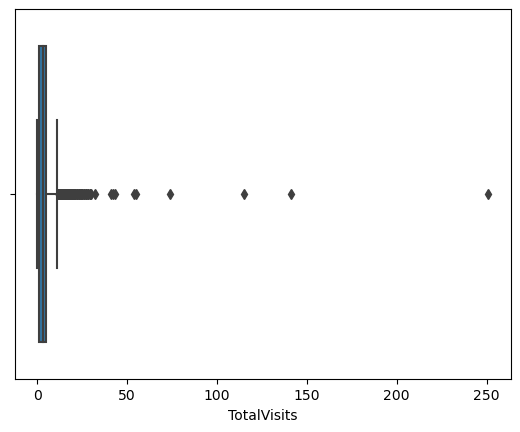

In [503]:
cap_totalvisit=data['TotalVisits']
sns.boxplot(x=cap_totalvisit);

10


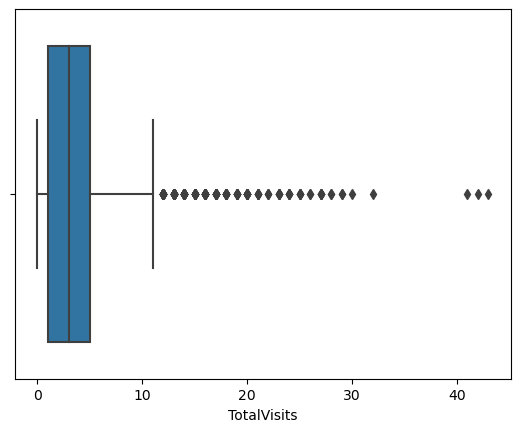

In [504]:
cap_totalvisit=data[data['TotalVisits']<50]['TotalVisits']
print(data[data['TotalVisits']>30]['TotalVisits'].count())
sns.boxplot(x=cap_totalvisit);

In [505]:
# there is visible oulire but on careful observation it is normal data 
# as very few counts are gerter than 30 might be some choosy people
# imputing missing values with median values
data['TotalVisits'].fillna(data['TotalVisits'].median(),inplace=True)



In [506]:
print(data['TotalVisits'].isna().sum())

0


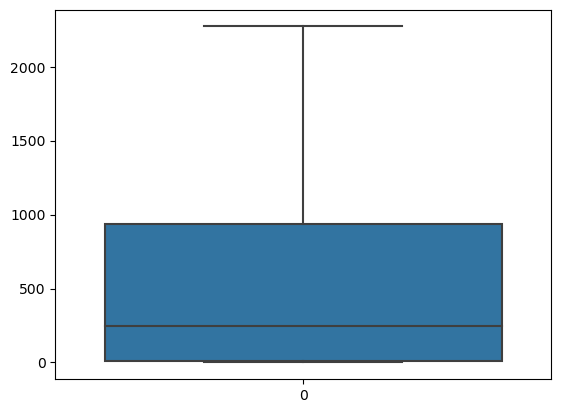

In [507]:
sns.boxplot(data['Total Time Spent on Website']);
# no outlier in total time spent but there is difference in mean and median but somthing is wrong 
# that is all data is skewed toward  left

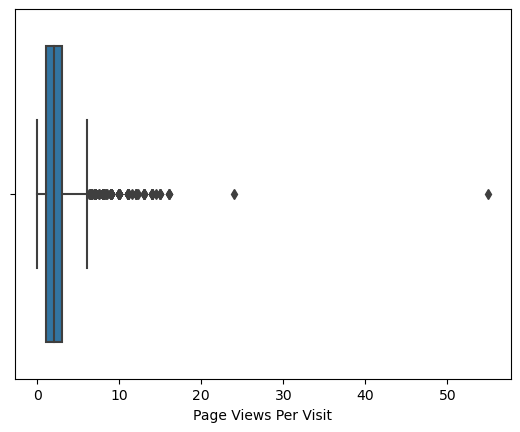

In [508]:
# fetaure ' page views per visit'

sns.boxplot(x=data['Page Views Per Visit']);

50


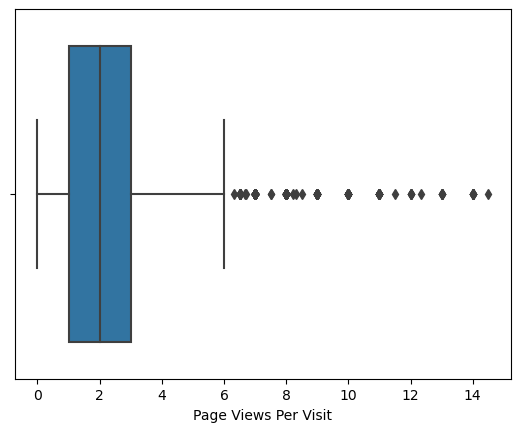

In [509]:
cap_pagesviewed=data[data['Page Views Per Visit']<15]['Page Views Per Visit']
sns.boxplot(x=cap_pagesviewed);
print(data[data['Page Views Per Visit']>10]['Page Views Per Visit'].count())

In [510]:
print(data[data['Page Views Per Visit']>10]['Page Views Per Visit'].count())
print('value greter than 10 correcpond to ',(data[data['Page Views Per Visit']>10]['Page Views Per Visit'].count()/data.shape[0])*100,'%')

50
value greter than 10 correcpond to  0.5411255411255411 %


In [511]:
# as values appears to be outlier but it might be possible that a person browsed
# a lot of courses so not a outlier
# imputing missing values
data['Page Views Per Visit']=data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median())
data['Page Views Per Visit'].isna().sum()

0

In [512]:
'Asymmetrique Activity Score'

'Asymmetrique Activity Score'

In [513]:
# missing data in Asymmetrique Activity Score

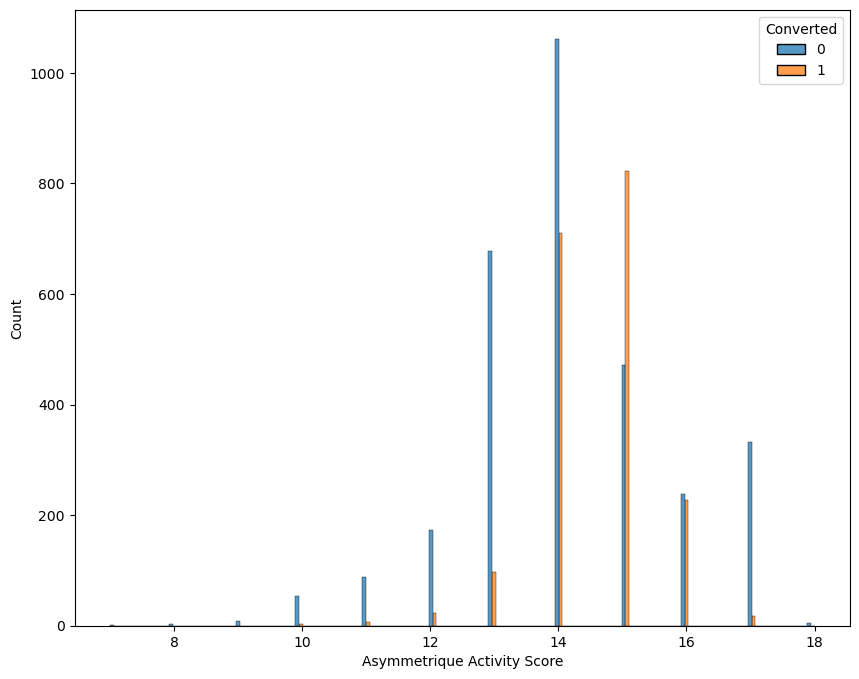

In [514]:
plt.figure(figsize=(10,8))
sns.histplot(x=data['Asymmetrique Activity Score'], hue=data['Converted'],multiple='dodge');

In [515]:
# theer is ouliers and data is skewed
data['Asymmetrique Activity Score'].fillna(data['Asymmetrique Activity Score'].mean(),inplace=True)


In [516]:
data['Asymmetrique Activity Score'].isna().sum()

0

<Axes: xlabel='Asymmetrique Profile Score', ylabel='Count'>

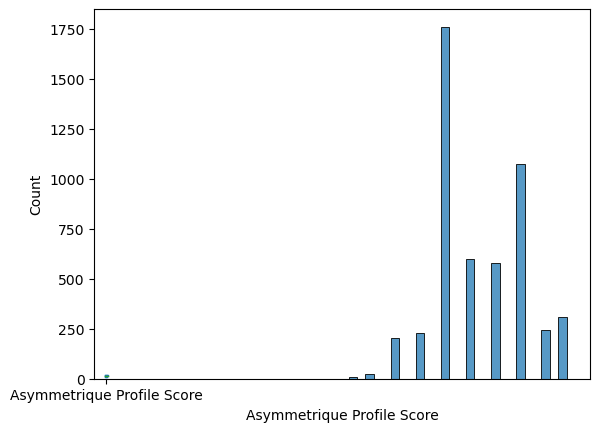

In [517]:
data['Asymmetrique Profile Score'].plot.box()
sns.histplot(data['Asymmetrique Profile Score'])

In [518]:
data['Asymmetrique Profile Score'].fillna(data['Asymmetrique Profile Score'].median(), inplace=True)

In [519]:
data['Asymmetrique Profile Score'].isna().sum()

0

In [520]:
data[numerical_col].describe(percentiles=[.80,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440,14.306252,16.187446
std,0.486714,4.819024,548.021466,2.145781,1.022265,1.346358
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
50%,0.000000,3.000000,248.000000,2.000000,14.306252,16.000000
80%,1.000000,5.000000,1087.200000,4.000000,15.000000,17.000000
90%,1.000000,7.000000,1380.000000,5.000000,15.000000,18.000000
95%,1.000000,10.000000,1562.000000,6.000000,16.000000,19.000000
99%,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


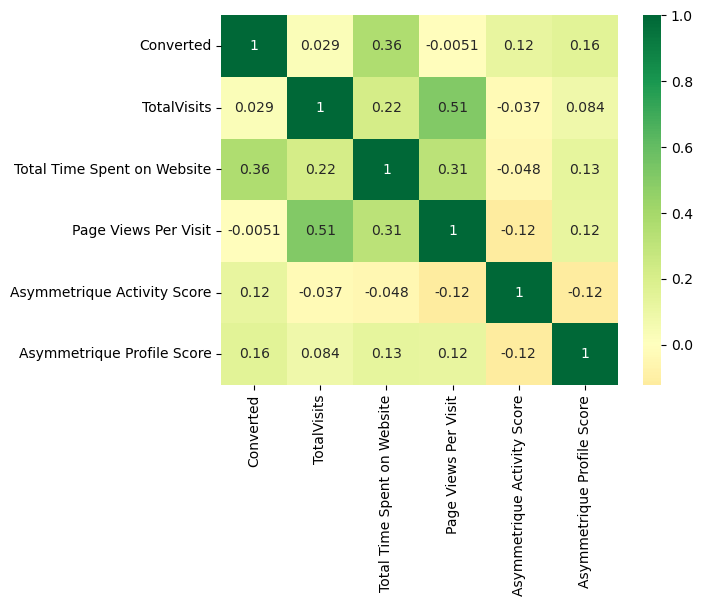

In [521]:
sns.heatmap(data[numerical_col].corr(),annot=True, cmap='RdYlGn',center=0);



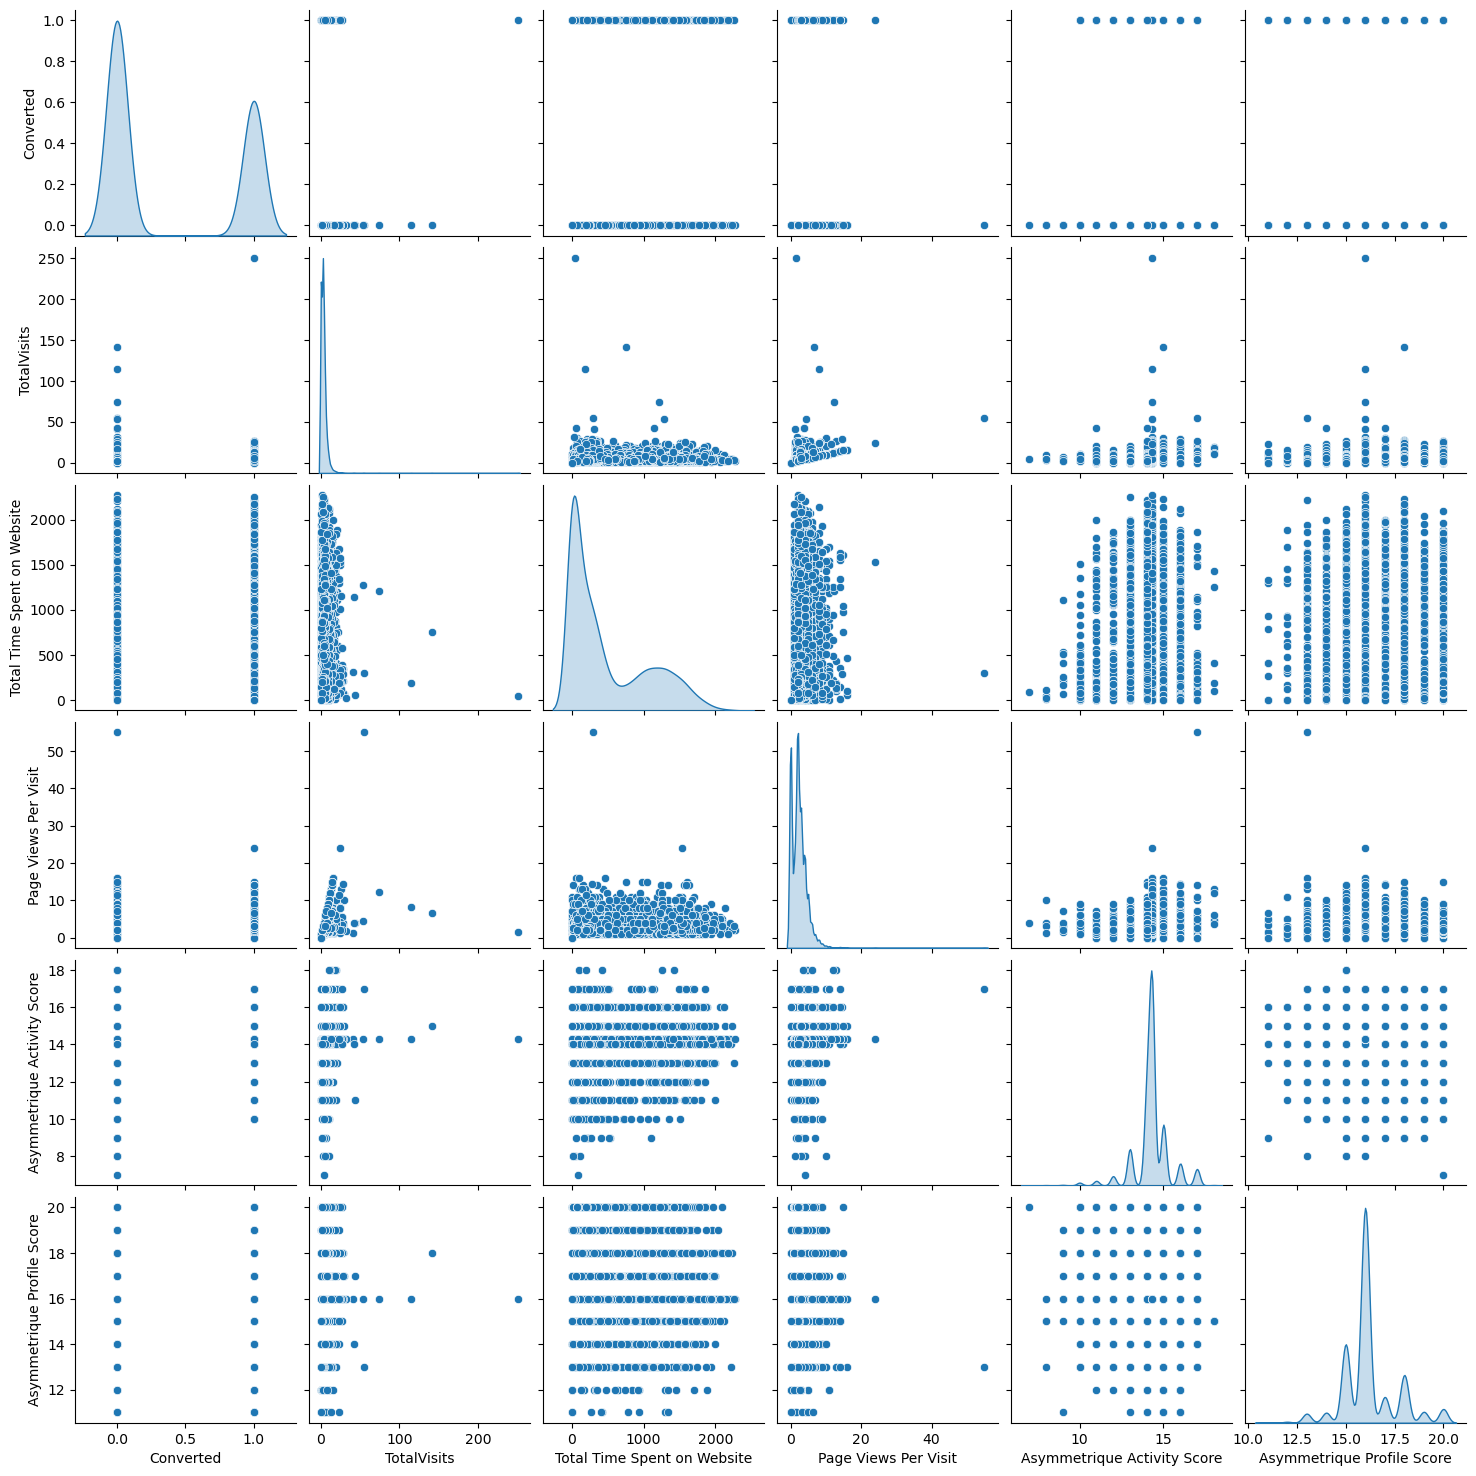

In [522]:
sns.pairplot(data[numerical_col],diag_kind='kde');

Encoding


In [523]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [524]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [525]:
import sklearn

In [526]:
Category_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [527]:
data.drop(columns=['Asymmetrique Activity Index',
 'Asymmetrique Profile Index'], inplace=True)
Category_col.remove('Asymmetrique Profile Index')
Category_col.remove('Asymmetrique Activity Index')

In [528]:
Category_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [529]:
len(Category_col)

14

In [530]:
pd.set_option('display.max_columns',200)

In [531]:
cat_converted=pd.get_dummies(data[Category_col],drop_first=True).astype(int)

cat_converted.head(1)

,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Missing,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Missing,Last Activity_Olark Chat Conversation,Last Activity_Other last activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Country_India,Country_Missing,Country_Other Country,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Missing,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Missing,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable actvity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [532]:
data=pd.concat([data,cat_converted],axis=1)

In [533]:
data.shape

(9240, 141)

In [534]:
data.head(1)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Missing,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Missing,Last Activity_Olark Chat Conversation,Last Activity_Other last activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Country_India,Country_Missing,Country_Other Country,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Missing,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Missing,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modifie

In [535]:
Category_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [536]:
data.drop(columns=Category_col, inplace=True, errors='ignore')


In [537]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Missing,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Missing,Last Activity_Olark Chat Conversation,Last Activity_Other last activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Country_India,Country_Missing,Country_Other Country,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Missing,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Missing,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable actvity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,15.0,15.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0

In [538]:
data.describe(percentiles=[.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Missing,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Missing,Last Activity_Olark Chat Conversation,Last Activity_Other last activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Country_India,Country_Missing,Country_Other Country,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Missing,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Missing,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable actvity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.00

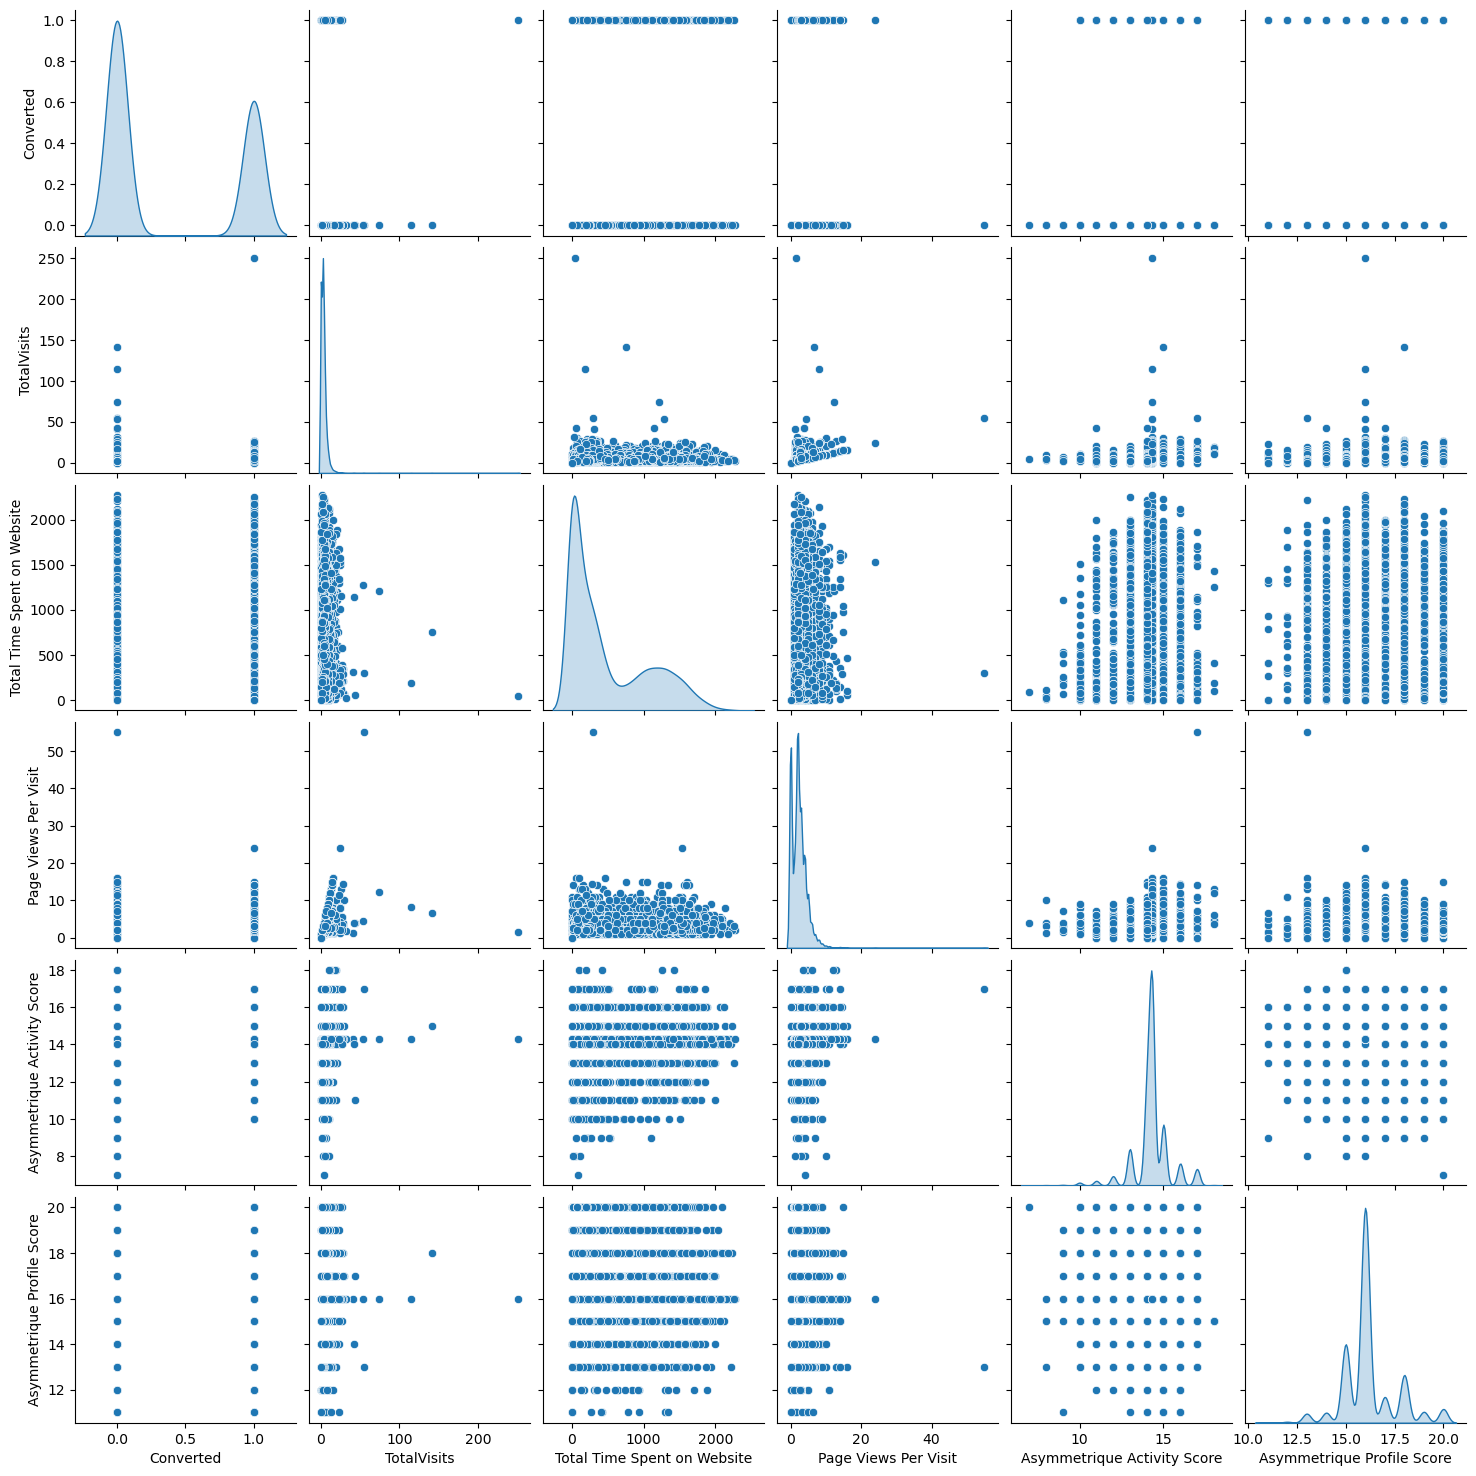

In [539]:
sns.pairplot(data[numerical_col], diag_kind='kde');

In [540]:
import warnings
warnings.filterwarnings('ignore')


Model building

In [541]:
from sklearn.preprocessing import StandardScaler

In [542]:
from sklearn.linear_model import LogisticRegression

In [543]:
from sklearn.model_selection import train_test_split

In [544]:
dtrain,dtest=train_test_split(data,random_state=50,test_size=.3)

In [545]:
ytrain=dtrain.pop('Converted')
ytest=dtest.pop('Converted')

In [546]:
scaler=StandardScaler()

In [547]:
lists=['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score','Asymmetrique Profile Score']
dtrain[lists]=scaler.fit_transform(dtrain[lists])

In [548]:
lists=['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score','Asymmetrique Profile Score']
dtest[lists]=scaler.transform(dtest[lists])

In [549]:
dtrain.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Missing,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Missing,Last Activity_Olark Chat Conversation,Last Activity_Other last activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Country_India,Country_Missing,Country_Other Country,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Missing,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Missing,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Missing,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Missing,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable actvity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3241,0.150297,0.871654,-0.476187,0.00293,-0.138238,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [550]:
m=LogisticRegression().fit(dtrain,ytrain)

In [551]:
ypred1=m.predict(dtrain)
ypred1

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [552]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [553]:
print('reference model is ')
print('Accuracy score',m.score(dtrain,ytrain))
print('precision for m1 is',precision_score(y_pred=ypred1,y_true=ytrain))
print('recall  for m1 is',recall_score(y_pred=ypred1,y_true=ytrain))



reference model is 
Accuracy score 0.9435683364254793
precision for m1 is 0.9475437135720233
recall  for m1 is 0.9049701789264414


In [554]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
accuracy_score(ytrain, ypred1)
# r2_score(ytrain,ypred1)

0.9435683364254793

In [555]:
# cheking for over fit
ytest1=m.predict(dtest)

In [556]:
def eva(dtrain,ytrain,m):
    print('Precision for the new model is:', precision_score(y_true=ytrain, y_pred=m.predict(dtrain)))
    print('Accuracy for the new model is:', accuracy_score(y_true=ytrain, y_pred=m.predict(dtrain)))
    print('Recall for the new model is:', recall_score(y_true=ytrain, y_pred=m.predict(dtrain)))
    print('Accuracy score',m.score(dtrain,ytrain))

    from sklearn.metrics import roc_curve,roc_auc_score
    fpr, tpr, thresholds = roc_curve(ytrain, m.predict(dtrain), drop_intermediate=False)
    auc_score = roc_auc_score(ytrain, m.predict(dtrain))
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'ROC Curve (Area = {auc_score:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
  


M evaluation

Precision for the new model is: 0.9475437135720233
Accuracy for the new model is: 0.9435683364254793
Recall for the new model is: 0.9049701789264414
Accuracy score 0.9435683364254793


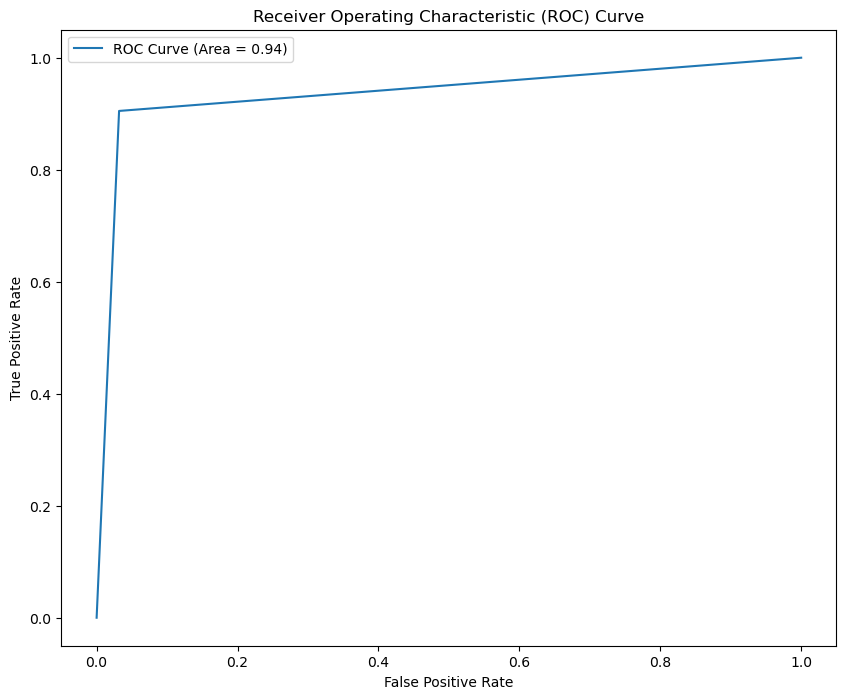

In [557]:
eva(dtrain,ytrain,m)

Precision for the new model is: 0.9216634429400387
Accuracy for the new model is: 0.9372294372294372
Recall for the new model is: 0.9110898661567878
Accuracy score 0.9372294372294372


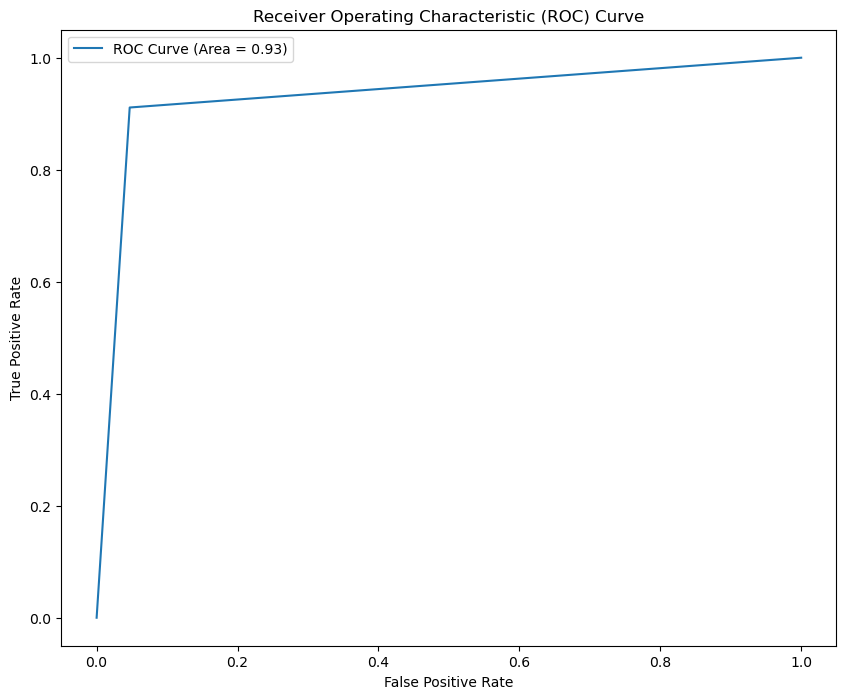

In [558]:
eva(dtest, ytest, m)

In [559]:
# rfe
from sklearn.feature_selection import RFE

model 2 with 100 fetures

In [560]:
dtrain.shape

(6468, 124)

In [561]:
from sklearn.feature_selection import RFE

In [562]:
m1=LogisticRegression()
rfe=RFE(m1,n_features_to_select=100).fit(dtrain,ytrain)


In [563]:
list(zip(dtrain.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Missing', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', False, 11),
 ('Last Activity_Missing', True, 1),
 ('

In [564]:
# Assuming rfe.support_ is a boolean mask indicating selected features
selected_columns_model2 = dtrain.columns[rfe.support_]
dtrain2 = dtrain[selected_columns_model2]


In [565]:
dtrain.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       ...
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other Notable actvity',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object', length=124)

In [566]:
m2=LogisticRegression().fit(dtrain2,ytrain)

In [567]:
ytrain_p2= m2.predict(dtrain2)
ytrain_p2.shape

(6468,)

In [568]:
ytest.shape

(2772,)

model 2 eval

Precision for the new model is: 0.9478297161936561
Accuracy for the new model is: 0.9429499072356216
Recall for the new model is: 0.9029821073558648
Accuracy score 0.9429499072356216


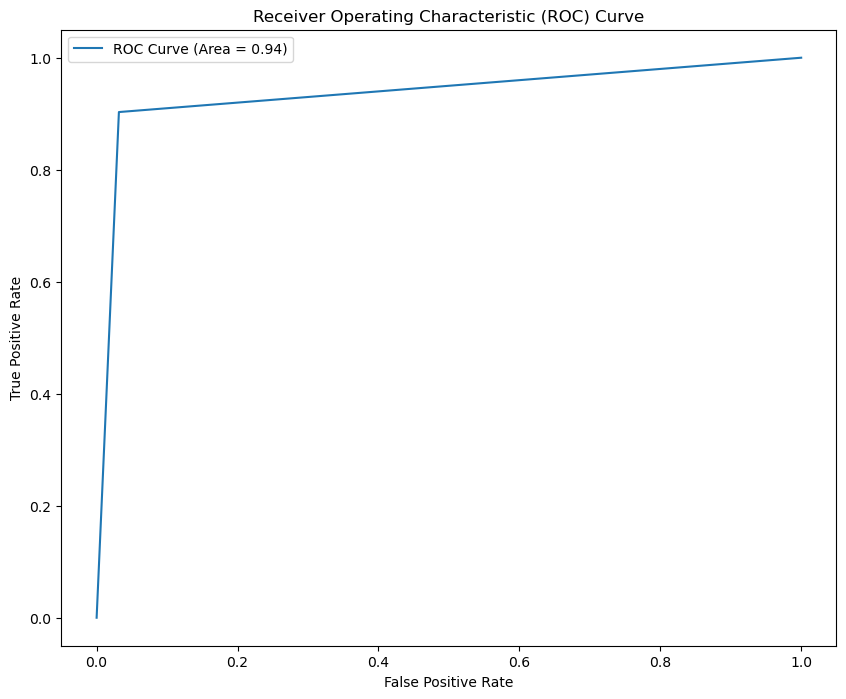

In [569]:
eva(dtrain2,ytrain,m2)

Precision for the new model is: 0.9216634429400387
Accuracy for the new model is: 0.9372294372294372
Recall for the new model is: 0.9110898661567878
Accuracy score 0.9372294372294372


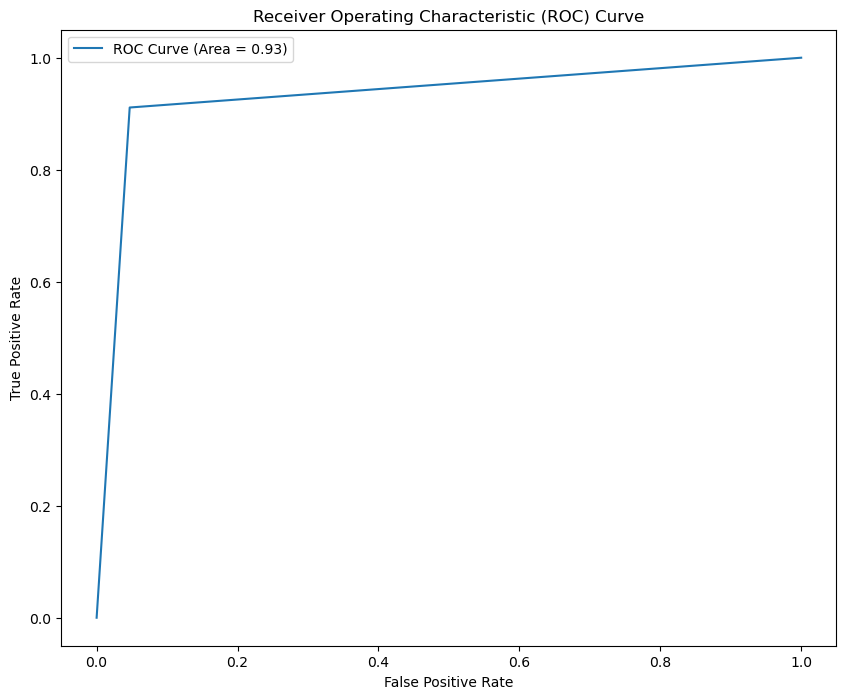

In [570]:
# evaluation on test
dtest2=dtest[selected_columns_model2]
eva(dtest2,ytest,m2)

In [571]:
# model m2 is not much different from m1 so reduced parametrs have less impact

Model 3 with 75

In [572]:
m2rfe=LogisticRegression()
rfe2=RFE(m2rfe,n_features_to_select=75).fit(dtrain2,ytrain)

In [573]:
list(zip(dtrain2.columns,rfe2.support_,rfe2.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Asymmetrique Activity Score', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Missing', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Uns

In [574]:
selected_columns_model3=dtrain2.columns[rfe2.support_]
dtrain3=dtrain2[selected_columns_model3]

In [575]:
pd.set_option('display.max_rows',2000)

In [576]:
dtrain3.columns

Index(['Total Time Spent on Website', 'Asymmetrique Activity Score',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_Missing',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Country_Missing', 'Country_Saudi Arabia',
       'Country_United Arab Emirates', 'Country_United States',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Sp

In [577]:
m3=LogisticRegression().fit(dtrain3,ytrain)
ytrain_p3=m3.predict(dtrain3)


Precision for the new model is: 0.9470833333333334
Accuracy for the new model is: 0.9429499072356216
Recall for the new model is: 0.9037773359840954
Accuracy score 0.9429499072356216


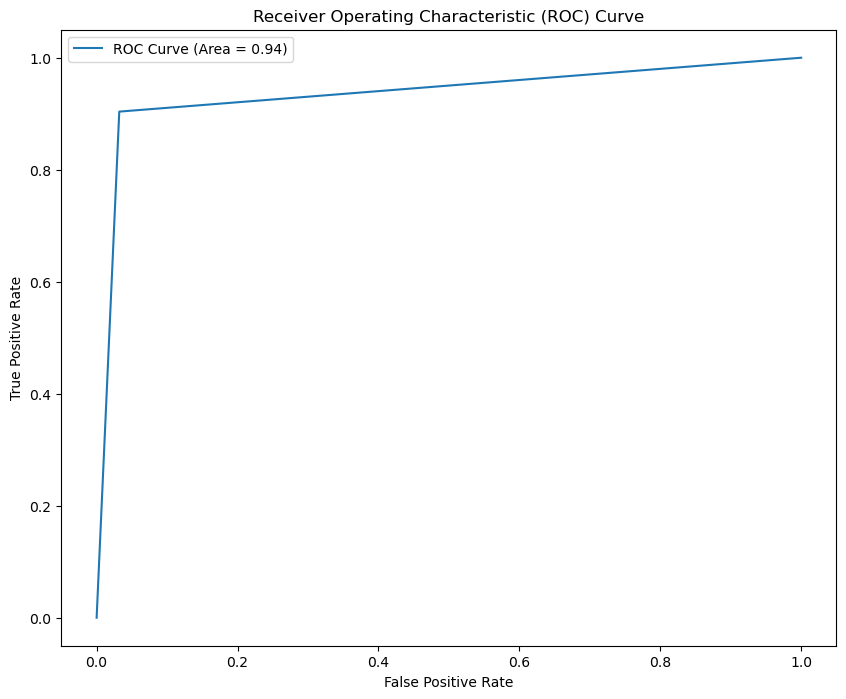

In [578]:
eva(dtrain3,ytrain,m3)

Precision for the new model is: 0.9244917715392061
Accuracy for the new model is: 0.939033189033189
Recall for the new model is: 0.9130019120458891
Accuracy score 0.939033189033189


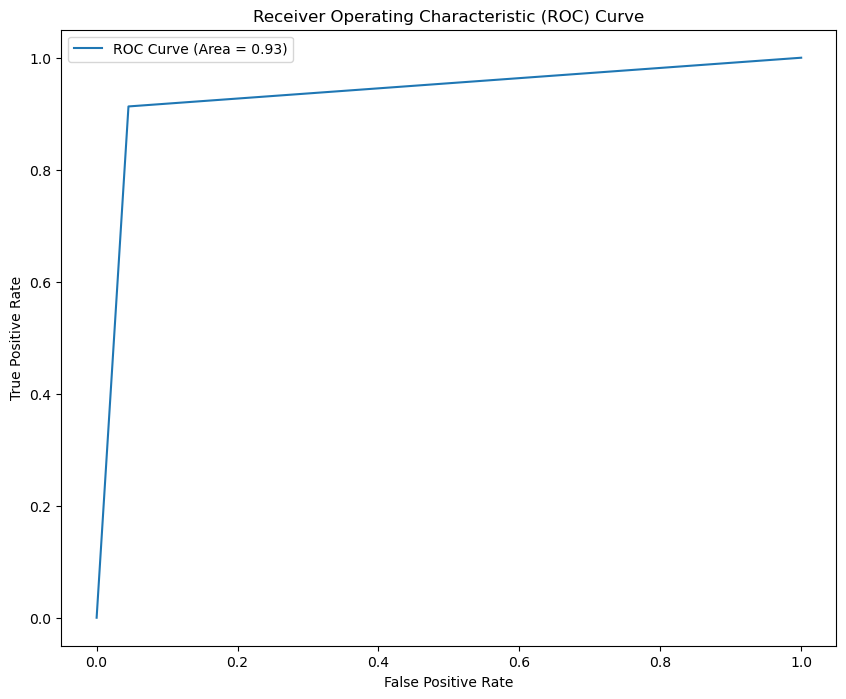

In [579]:
# evaluation on test
dtest3=dtest2[selected_columns_model3]
eva(dtest3,ytest,m3)

Model 4 features 40

In [580]:
m3rfe=LogisticRegression()
rfe3=RFE(m3,n_features_to_select=40).fit(dtrain3,ytrain)

In [581]:
list(zip(dtrain3.columns,rfe3.support_,rfe3.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Asymmetrique Activity Score', False, 8),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Olark Chat', False, 33),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Reference', False, 13),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 21),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Missing', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 20),
 ('Last Activity_Unsubscribed', False, 6),
 ('Country_Missing', Tr

In [582]:
selected_columns_model4=dtrain3.columns[rfe3.support_]
# selected_columns_model4 = pd.unique(selected_columns_model4)
dtrain4=dtrain3[selected_columns_model4]


In [583]:
dtrain4.columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Country_Missing', 'Country_Saudi Arabia',
       'Country_United Arab Emirates', 'Specialization_Travel and Tourism',
       'What matters most to you in choosing a course_Missing', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch',
       'Tags_Interested in other courses', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Missing', 'Tags_Not doing further education',
       'Tags_Ringing', 'Tags_Shall take in the next coming month',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number no

In [584]:
m4=LogisticRegression().fit(dtrain4,ytrain)
ytrain_p4=m4.predict(dtrain4)

Precision for the new model is: 0.9412494828299545
Accuracy for the new model is: 0.9409400123685838
Recall for the new model is: 0.904572564612326
Accuracy score 0.9409400123685838


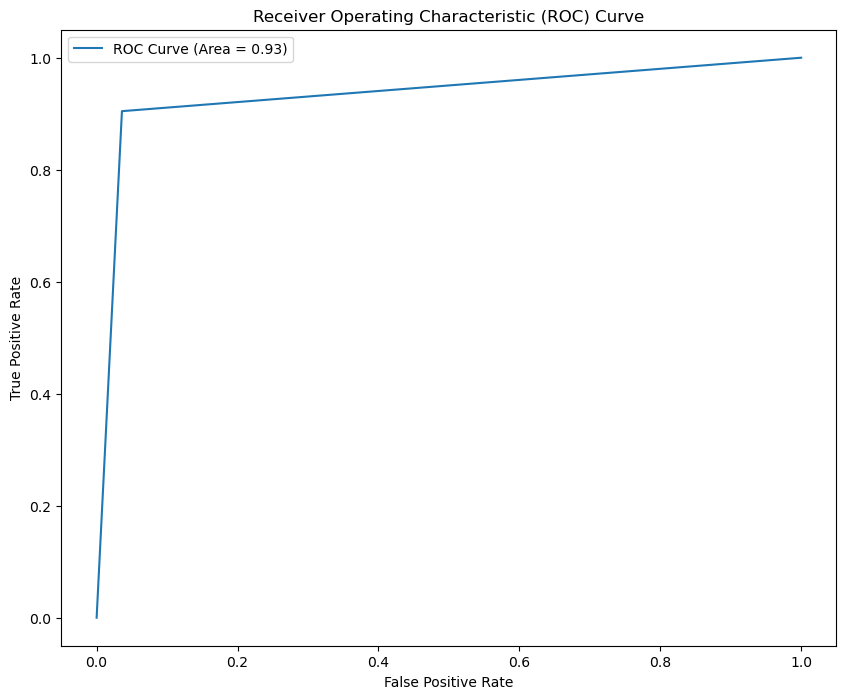

In [585]:
eva(dtrain4,ytrain,m4)

Precision for the new model is: 0.9176245210727969
Accuracy for the new model is: 0.9372294372294372
Recall for the new model is: 0.9158699808795411
Accuracy score 0.9372294372294372


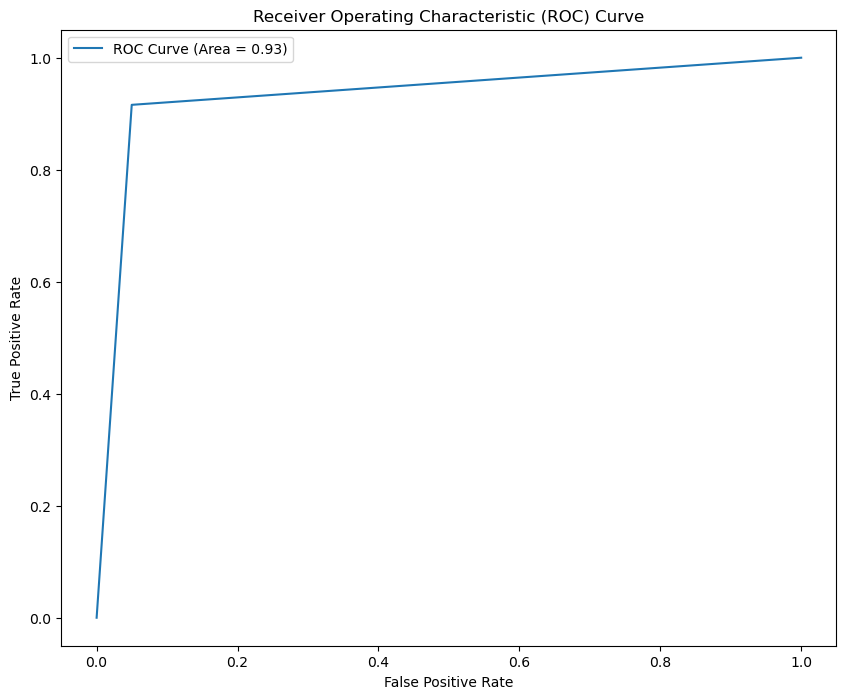

In [586]:
# evaluation on test
dtest4=dtest3[selected_columns_model4]
eva(dtest4,ytest,m4)

Model 5 30 feat


In [587]:
rfe4=RFE(m4,n_features_to_select=30).fit(dtrain4,ytrain)
list(zip(dtrain4.columns,rfe4.support_,rfe4.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Lead Origin_Lead Add Form', False, 10),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_SMS Sent', False, 6),
 ('Country_Missing', True, 1),
 ('Country_Saudi Arabia', False, 8),
 ('Country_United Arab Emirates', False, 3),
 ('Specialization_Travel and Tourism', False, 2),
 ('What matters most to you in choosing a course_Missing', True, 1),
 ('Tags_Busy', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Diploma holder (Not Eligible)', True, 1),
 ('Tags_Interested  in full time MBA', True, 1),
 ('Tags_Interested in Next batch', True, 1),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Lateral student', True, 1),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Missing', True, 1),
 ('Tags_Not doing further education', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Shall take in the n

In [588]:
selecting_colm5=dtrain4.columns[rfe4.support_]
dtrain5=dtrain4[selecting_colm5]

In [589]:
m5=LogisticRegression().fit(dtrain5,ytrain)

In [590]:
m5.predict(dtrain5)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

Precision for the new model is: 0.9407622203811102
Accuracy for the new model is: 0.9401669758812616
Recall for the new model is: 0.9029821073558648
Accuracy score 0.9401669758812616


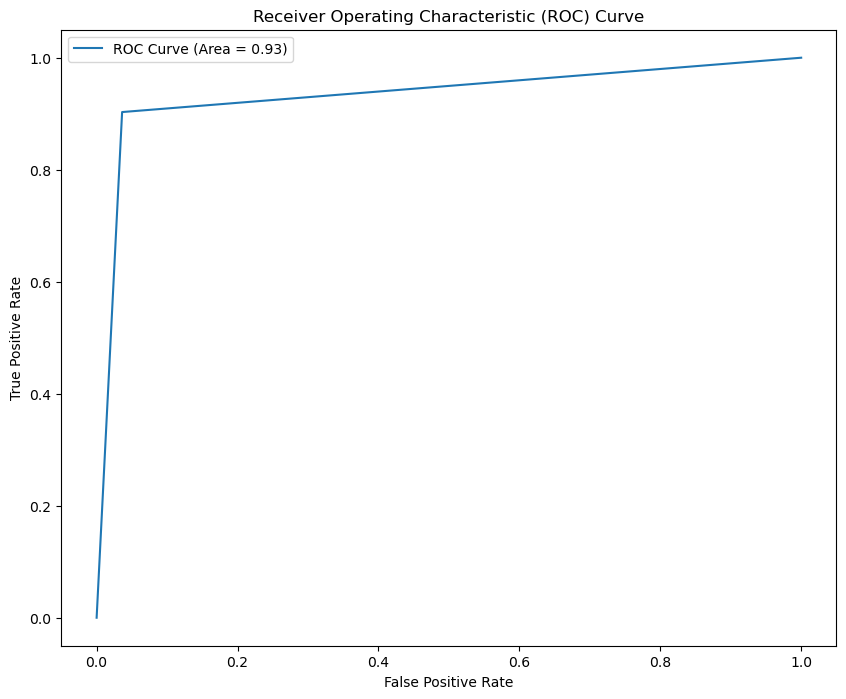

In [591]:
eva(dtrain5,ytrain,m5)

Model 6 feat 15

In [592]:
rfe5=RFE(m5,n_features_to_select=15).fit(dtrain5,ytrain)

In [593]:
selecting_colm6 = dtrain5.columns[rfe5.support_]
dtrain6 = dtrain5[selecting_colm6]

In [594]:
m6=LogisticRegression().fit(dtrain6,ytrain)

Precision for the new model is: 0.8947163947163947
Accuracy for the new model is: 0.9253246753246753
Recall for the new model is: 0.9157057654075547
Accuracy score 0.9253246753246753


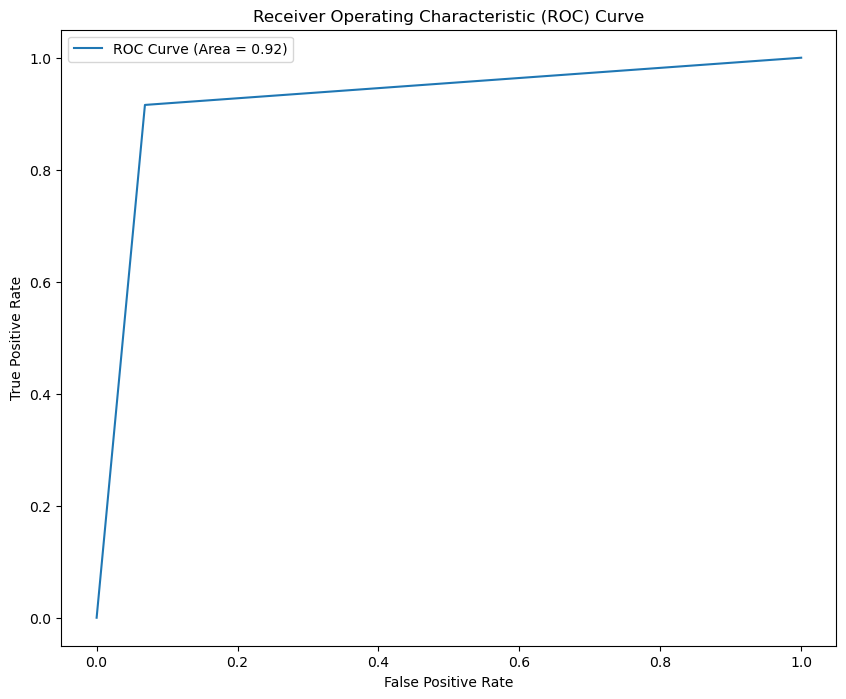

In [595]:
eva(dtrain6,ytrain,m6)

In [596]:
ytrainpred_6=m6.predict(dtrain6)
ytrainpred_6[:10]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [597]:
ytrainpred_6_prob=m6.predict_proba(dtrain6)
ytrainpred_6_prob[:10]

array([[0.00507715, 0.99492285],
       [0.16825291, 0.83174709],
       [0.91244276, 0.08755724],
       [0.95324502, 0.04675498],
       [0.07728418, 0.92271582],
       [0.91244276, 0.08755724],
       [0.91244276, 0.08755724],
       [0.99120721, 0.00879279],
       [0.91244276, 0.08755724],
       [0.07533541, 0.92466459]])

Model 7 10

In [598]:
rfe6=RFE(m6,n_features_to_select=10).fit(dtrain6,ytrain)

In [599]:
selected_col7=dtrain6.columns[rfe6.support_]
dtrain7=dtrain6[selected_col7]

In [600]:
import statsmodels.api as sm 

In [601]:
dtrain7_const=sm.add_constant(dtrain7)


In [602]:
sm1=sm.GLM(ytrain,dtrain7_const, family=sm.families.Binomial()).fit()

In [603]:
sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1322.6
Date:                Thu, 14 Dec 2023   Deviance:                       2645.2
Time:                        21:06:42   Pearson chi2:                 8.19e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.6045
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4808      0.159    -28.176      0.000      -4.792      -4.169
Lead Source_Welingak Website                 3.5941      1.018      3.530      0.000       1.599       5.590
Tags_Busy                                    3.6568      0.255     14.364      0.000       3.158       4.156
Tags_Closed by Horizzon                      9.9637      1.015      9.820      0.000       7.975      11.952
Tags_Lateral student                        25.5602   1.59e+04      0.002      0.999   -3.11e+04    3.12e+04
Tags_Lost to EINS                           10.6691      1.031     10.353      0.000       8.649      12.689
Tags_Missing                                 4.5171      0.189     23.923      0.000       4.147       4.887
Tags_Will revert after reading the email     7.3523      0.219     33.618      0.000       6.924       7.781
Tags_switched off                           -1.6787      0.729     -2.303      0.021      -3.107      -0.250
Lead Profile_Missing                        -2.4779      0.138    -17.988      0.000      -2.748      -2.208
Last Notable Activity_SMS Sent               2.5611      0.125     20.465      0.000       2.316       2.806
============================================================================================================
"""

In [604]:
# dropping 'Tags_Lateral student'
dtrain8=dtrain7.drop(columns='Tags_Lateral student')


In [605]:
dtrain8_const=sm.add_constant(dtrain8)
sm2=sm.GLM(ytrain,dtrain8_const, family=sm.families.Binomial()).fit()
sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1333.6
Date:                Thu, 14 Dec 2023   Deviance:                       2667.1
Time:                        21:06:42   Pearson chi2:                 8.17e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6031
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4192      0.156    -28.365      0.000      -4.725      -4.114
Lead Source_Welingak Website                 3.5935      1.018      3.530      0.000       1.598       5.589
Tags_Busy                                    3.6010      0.252     14.262      0.000       3.106       4.096
Tags_Closed by Horizzon                      9.9022      1.014      9.764      0.000       7.915      11.890
Tags_Lost to EINS                           10.6054      1.030     10.296      0.000       8.587      12.624
Tags_Missing                                 4.4575      0.186     23.947      0.000       4.093       4.822
Tags_Will revert after reading the email     7.2919      0.216     33.698      0.000       6.868       7.716
Tags_switched off                           -1.7262      0.728     -2.370      0.018      -3.154      -0.298
Lead Profile_Missing                        -2.4753      0.138    -17.993      0.000      -2.745      -2.206
Last Notable Activity_SMS Sent               2.5453      0.124     20.478      0.000       2.302       2.789
============================================================================================================
"""

In [606]:
dtrain_pred=sm2.predict(dtrain8_const)

In [607]:
dtrain_pred=sm2.predict(dtrain8_const)

In [608]:
# threshold = 0.5
ytrain_final_arbitary = dtrain_pred.apply(lambda x: 1 if x >= 0.5 else 0)


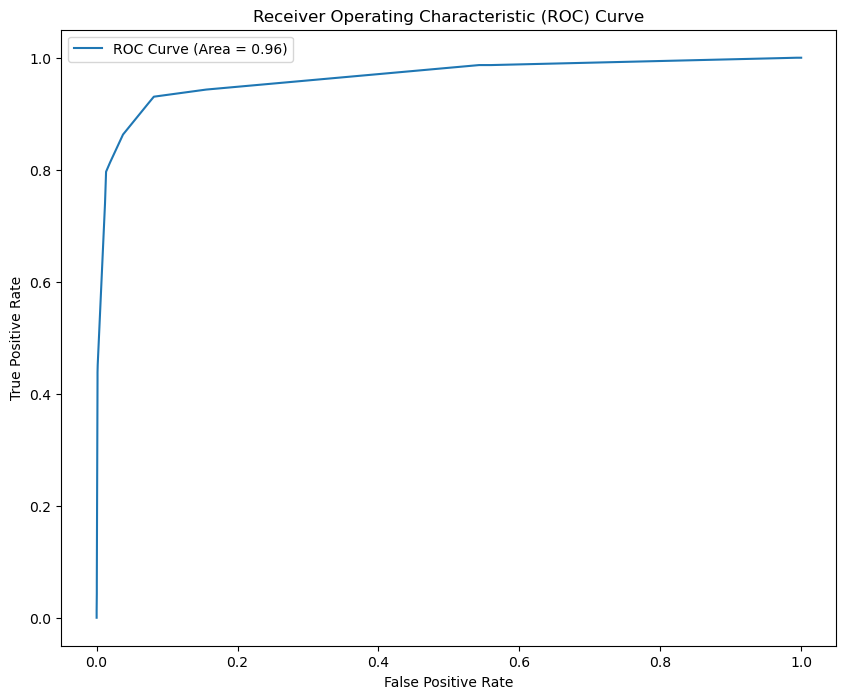

In [609]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(ytrain, sm2.predict(dtrain8_const), drop_intermediate=False)
auc_score = roc_auc_score(ytrain, sm2.predict(dtrain8_const))
    
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (Area = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [610]:
print('Recall',recall_score(ytrain,ytrain_final_arbitary))
print('precision',precision_score(ytrain,ytrain_final_arbitary))


Recall 0.9172962226640159
precision 0.8893600616808018


In [611]:
dtrain8.shape

(6468, 9)

In [612]:
dtest8=dtest[['Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Missing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Missing', 'Last Notable Activity_SMS Sent']]

In [613]:
dtest_cons=sm.add_constant(dtest8)
dtest_pred=sm2.predict(dtest_cons)


In [614]:
# score score for lead  conversion
# higher the score higher prbability of converison
Lead_score=dtest_pred*100
Lead_score.head()

2018    94.647831
8181    13.308944
2032    94.647831
529     97.612729
3641    13.308944
dtype: float64

In [615]:
# looking at score in term of converted (1) or not (0)

In [616]:
# threshold = 0.5
ytest_final_pred = dtest_pred.apply(lambda x: 1 if x >= 0.5 else 0)



In [617]:
print('Recall',recall_score(ytest,ytest_final_pred))
print('precision',precision_score(ytest,ytest_final_pred))

Recall 0.9349904397705545
precision 0.8794964028776978


threshold


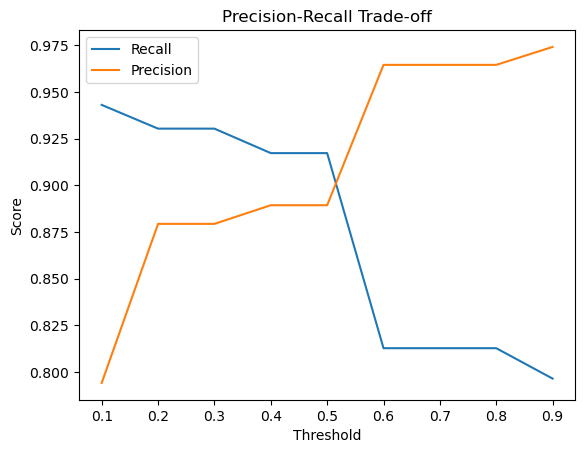

In [618]:
thresholds = np.linspace(0.1, 0.9, 9)  # Specify your range of thresholds

recall_values = []
precision_values = []

for threshold in thresholds:
    ytrain_final_arbitrary = dtrain_pred.apply(lambda x: 1 if x >= threshold else 0)
    recall = recall_score(ytrain, ytrain_final_arbitrary)
    precision = precision_score(ytrain, ytrain_final_arbitrary)
    recall_values.append(recall)
    precision_values.append(precision)

plt.plot(thresholds, recall_values, label='Recall')
plt.plot(thresholds, precision_values, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.legend(loc='best')
plt.show()

Threshold value Calculations

In [619]:

thresholds = np.linspace(0.1, 0.9, 10)

scores = []

for i in thresholds:
    ytrain_final_arbitrary = dtrain_pred.apply(lambda x: 1 if x >= i else 0)
    recall = recall_score(ytrain, ytrain_final_arbitrary)
    precision = precision_score(ytrain, ytrain_final_arbitrary)
    scores.append({'threshold': i, 'Recall': recall, 'Precision': precision})

score_df = pd.DataFrame(scores)
print(score_df)


   threshold    Recall  Precision
0   0.100000  0.943141   0.794108
1   0.188889  0.930417   0.879369
2   0.277778  0.930417   0.879369
3   0.366667  0.917296   0.889360
4   0.455556  0.917296   0.889360
5   0.544444  0.812724   0.964606
6   0.633333  0.812724   0.964606
7   0.722222  0.812724   0.964606
8   0.811111  0.812724   0.964606
9   0.900000  0.796421   0.974222


In [620]:
thresholds = np.linspace(0.455, 0.52, 10)

scores = []

for i in thresholds:
    ytrain_final_arbitrary = dtrain_pred.apply(lambda x: 1 if x >= i else 0)
    recall = recall_score(ytrain, ytrain_final_arbitrary)
    precision = precision_score(ytrain, ytrain_final_arbitrary)
    scores.append({'threshold': i, 'Recall': recall, 'Precision': precision})

score_df = pd.DataFrame(scores)
print(score_df)

   threshold    Recall  Precision
0   0.455000  0.917296   0.889360
1   0.462222  0.917296   0.889360
2   0.469444  0.917296   0.889360
3   0.476667  0.917296   0.889360
4   0.483889  0.917296   0.889360
5   0.491111  0.917296   0.889360
6   0.498333  0.917296   0.889360
7   0.505556  0.917296   0.889360
8   0.512778  0.862823   0.936152
9   0.520000  0.862823   0.936152


In [621]:
score_df['Mul']=score_df['Recall']*score_df['Precision']
score_df[['threshold','Mul']]

,threshold,Mul
0,0.455000,0.815807
1,0.462222,0.815807
2,0.469444,0.815807
3,0.476667,0.815807
4,0.483889,0.815807
5,0.491111,0.815807
6,0.498333,0.815807
7,0.505556,0.815807
8,0.512778,0.807733
9,0.520000,0.807733


threshold value= 0.512778

In [622]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(ytrain, dtrain_pred)


In [623]:
from sklearn.metrics import precision_recall_curve

In [624]:
# def find_best_threshold(threshould, fpr, tpr):
#    t = threshould[np.argmax(tpr*(1-fpr))]
#    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
#    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
#    return t

Threshold value for Predicting Converted i.e. 1 and Not converted i.e 0

In [625]:
# print('threshold value is')
# find_best_threshold(threshold,fpr,tpr)

In [626]:
dtrain_pred[dtrain_pred<.306].count()

3807

In [627]:
dtrain_threshold_final=dtrain_pred.apply(lambda x: 1 if x >= 0.512778 else 0)

In [628]:
ytest_threshold_pred = dtest_pred.apply(lambda x: 1 if x >= 0.512778 else 0)


In [629]:
from sklearn.metrics import f1_score

In [630]:
print('Recall',round(recall_score(ytrain,dtrain_threshold_final),2))
print('precision',round(precision_score(ytrain,dtrain_threshold_final),2))
print('Accuracy' ,round(accuracy_score(ytrain,dtrain_threshold_final),2))

Recall 0.86
precision 0.94
Accuracy 0.92


In [631]:
f1_score(ytrain,dtrain_threshold_final)

0.8979929650320712

In [632]:
print('Recall',round(recall_score(ytest,ytest_threshold_pred),2))
print('precision',round(precision_score(ytest,ytest_threshold_pred),2))
print('Accuracy',round(accuracy_score(ytest,ytest_threshold_pred),2))

Recall 0.87
precision 0.92
Accuracy 0.92


In [633]:
f1_score(ytest,ytest_threshold_pred)

0.896110290497292

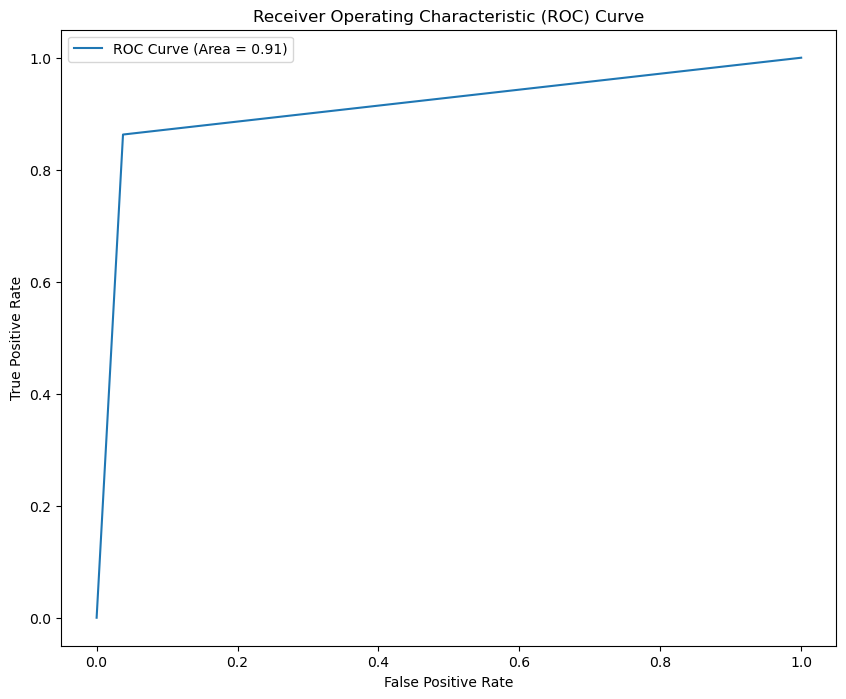

In [634]:

from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(ytrain, dtrain_threshold_final, drop_intermediate=False)
auc_score = roc_auc_score(ytrain, dtrain_threshold_final)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (Area = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [635]:
confusion=confusion_matrix(ytrain,dtrain_threshold_final)
confusion

array([[3805,  148],
       [ 345, 2170]], dtype=int64)

In [636]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

Check for Sensitivity

In [637]:
round(TP/float(FN+TP),2)

0.86

Check for Specificity


In [638]:
round(TN/float(TN+FP),2)

0.96

In [639]:
confusion=confusion_matrix(ytest,ytest_threshold_pred)
confusion

array([[1651,   75],
       [ 136,  910]], dtype=int64)

In [640]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

Check for Sensitivity

In [641]:
round(TP/float(FN+TP),2)

0.87

Check for Specificity

In [642]:
round(TN/float(TN+FP),2)

0.96

Lead scoring

In [643]:
'Lead score'
' A higher score would mean that the lead is hot most likely to convert'
'a lower score would mean that the lead is cold and will mostly not get converted.'

'a lower score would mean that the lead is cold and will mostly not get converted.'

In [651]:
Lead_score_test=dtest_pred*100
lead=dtrain_pred*100
Lead_score=pd.concat([Lead_score_test,lead  ], axis=0)
Lead_score

2018    94.647831
8181    13.308944
2032    94.647831
529     97.612729
3641    13.308944
          ...    
8262    99.586011
6214     1.190008
8324     8.039405
6253     8.039405
5600     1.190008
Length: 9240, dtype: float64

Top predictor variables

In [645]:
Top_pred=LogisticRegression()
rfe_top_pred=RFE(Top_pred,n_features_to_select=3).fit(dtrain8,ytrain)
list(zip(dtrain8.columns,rfe_top_pred.ranking_))
xtrain_top3=dtrain8.columns[rfe_top_pred.support_]
xtrain_top3

Index(['Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [646]:
sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1333.6
Date:                Thu, 14 Dec 2023   Deviance:                       2667.1
Time:                        21:06:46   Pearson chi2:                 8.17e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6031
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4192      0.156    -28.365      0.000      -4.725      -4.114
Lead Source_Welingak Website                 3.5935      1.018      3.530      0.000       1.598       5.589
Tags_Busy                                    3.6010      0.252     14.262      0.000       3.106       4.096
Tags_Closed by Horizzon                      9.9022      1.014      9.764      0.000       7.915      11.890
Tags_Lost to EINS                           10.6054      1.030     10.296      0.000       8.587      12.624
Tags_Missing                                 4.4575      0.186     23.947      0.000       4.093       4.822
Tags_Will revert after reading the email     7.2919      0.216     33.698      0.000       6.868       7.716
Tags_switched off                           -1.7262      0.728     -2.370      0.018      -3.154      -0.298
Lead Profile_Missing                        -2.4753      0.138    -17.993      0.000      -2.745      -2.206
Last Notable Activity_SMS Sent               2.5453      0.124     20.478      0.000       2.302       2.789
============================================================================================================
"""